<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [17]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
brain-tumor-classification-mri.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-05-13 12:42:24--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-13 12:42:24 (115 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [19]:
from helper_functions import unzip_data, walk_through_dir,plot_loss_curves

In [20]:
unzip_data('/content/brain-tumor-classification-mri.zip')

In [21]:
train_dir = '/content/Training'
test_dir = '/content/Testing'

In [22]:
walk_through_dir('/content/Testing')

There are 4 directories and 0 images in '/content/Testing'.
There are 0 directories and 100 images in '/content/Testing/glioma_tumor'.
There are 0 directories and 105 images in '/content/Testing/no_tumor'.
There are 0 directories and 74 images in '/content/Testing/pituitary_tumor'.
There are 0 directories and 115 images in '/content/Testing/meningioma_tumor'.


In [23]:
walk_through_dir('/content/Training')

There are 4 directories and 0 images in '/content/Training'.
There are 0 directories and 826 images in '/content/Training/glioma_tumor'.
There are 0 directories and 395 images in '/content/Training/no_tumor'.
There are 0 directories and 827 images in '/content/Training/pituitary_tumor'.
There are 0 directories and 822 images in '/content/Training/meningioma_tumor'.


In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_aug = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.1,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True)
test_data_aug = ImageDataGenerator(rescale=1/255.)

In [25]:
train_data = train_data_aug.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                class_mode="categorical",
                                                batch_size=32)
test_data = test_data_aug.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [30]:
model_0= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(4,4),
                           padding='valid',
                           strides=(1,1),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(4,4),
                           padding='valid',
                           strides=(1,1),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(4,4),
                           padding='valid',
                           strides=(1,1),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [34]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_0.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
history_0 = model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data ),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
90/90 [==============================] - 43s 429ms/step - loss: 1.3324 - accuracy: 0.3449 - val_loss: 1.4713 - val_accuracy: 0.3299
Epoch 2/5
90/90 [==============================] - 39s 434ms/step - loss: 1.2227 - accuracy: 0.4223 - val_loss: 1.7191 - val_accuracy: 0.2030
Epoch 3/5
90/90 [==============================] - 38s 427ms/step - loss: 1.1707 - accuracy: 0.4847 - val_loss: 2.2982 - val_accuracy: 0.2919
Epoch 4/5
90/90 [==============================] - 38s 428ms/step - loss: 1.0935 - accuracy: 0.5178 - val_loss: 2.5546 - val_accuracy: 0.3249
Epoch 5/5
90/90 [==============================] - 39s 431ms/step - loss: 1.0140 - accuracy: 0.5578 - val_loss: 2.3487 - val_accuracy: 0.3731


In [42]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [43]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data ),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
90/90 [==============================] - 47s 454ms/step - loss: 1.1188 - accuracy: 0.5139 - val_loss: 1.7944 - val_accuracy: 0.2157
Epoch 2/5
90/90 [==============================] - 40s 449ms/step - loss: 1.0166 - accuracy: 0.5774 - val_loss: 2.1469 - val_accuracy: 0.1751
Epoch 3/5
90/90 [==============================] - 40s 450ms/step - loss: 0.9713 - accuracy: 0.5895 - val_loss: 2.3985 - val_accuracy: 0.1878
Epoch 4/5
90/90 [==============================] - 42s 464ms/step - loss: 0.9308 - accuracy: 0.6125 - val_loss: 3.3332 - val_accuracy: 0.1878
Epoch 5/5
90/90 [==============================] - 40s 446ms/step - loss: 0.8981 - accuracy: 0.6254 - val_loss: 3.3815 - val_accuracy: 0.1878


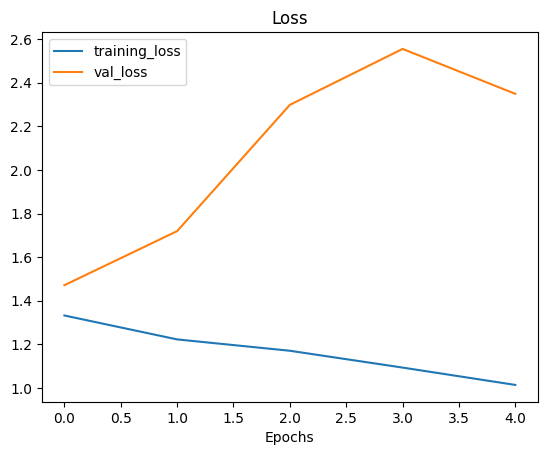

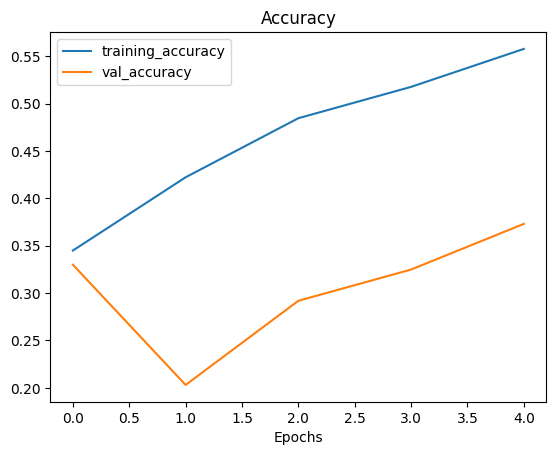

In [40]:
plot_loss_curves(history_0)

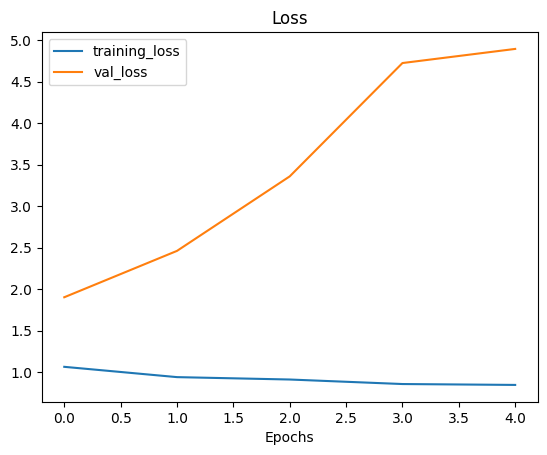

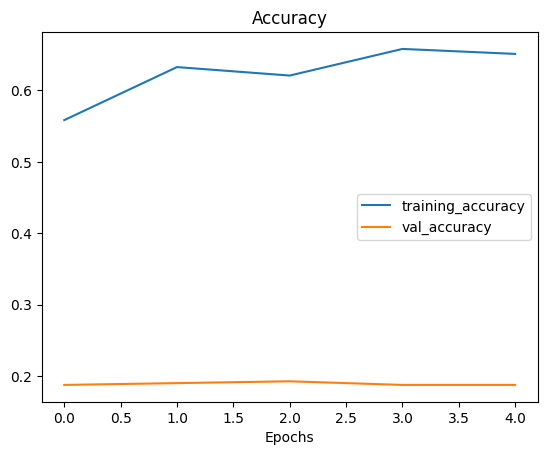

In [41]:
plot_loss_curves(history_1)